In [194]:
import hapi
from hapi import *
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import wofz
import pandas as pd

In [196]:
#некоторые константы

N_a = 6.02214125e23
M = 16.031300
c = 2.99792458e10
k = 1.380649e-16
c2 = 1.4387769

NI = 2.68678e19

In [198]:
T_ref = 296
T = 300

In [200]:
#ОБЪЕМНАЯ ДОЛЯ МЕТАНА В СМЕСИ 

C = 2.2e-6

In [202]:
#стат.сумма при Т=296К и Т=300К

q_t = 602.86666
q_ref = 590.52834

In [204]:
p = 1
p_self = p*C*0.988274 #давление CH4

In [206]:
N = NI*(273.0/T)*(p_self/p)

53158601850754.41

In [13]:
def Alfa_D(v0, T, M):
    alfa_d = (v0/c)*sqrt((2*N_a*k*T*np.log(2))/M)
    return alfa_d

In [15]:
def Gamma_L(T, n_air, p, p_self, gamma_air, gamma_self):
    gammaL = ((T_ref / T) ** n_air) * (gamma_air * (p - p_self) + gamma_self * p_self)
    return gammaL

In [17]:
def Lorentzian_Profile(v, v0, gammaL, delta_air):
    Fl = (1/math.pi)*(gammaL/((gammaL**2+(v-(v0+delta_air*p))**2)))
    return Fl

In [19]:
def Doppler_Profile(v, v0, alfa_d):
    Fg = sqrt(math.log(2) / (math.pi * (alfa_d**2))) * exp( - (((v - v0) ** 2) * math.log(2)) / alfa_d ** 2)
    return Fg

In [21]:
def Intensity(T, v0, e_lower):
    S = S_ref*(q_ref/q_t)*(exp((-c2*e_lower)/T)/exp((-c2*e_lower)/T_ref))*(1-exp((-c2*v0)/T))/(1-exp((-c2*v0)/T_ref))
    return S

In [23]:
def Absorption_Coefficient(S, profile):
    k = S*profile
    return k

In [25]:
def Transmission_Coefficient(k):
    t = np.exp(-k*n*l)
    return t

In [27]:
wavenum_min = 6056.5
wavenum_max = 6058

wn = np.linspace(wavenum_min, wavenum_max, 1000)

In [29]:
db_begin('data')

Using data

CH4
                     Lines parsed: 21


In [31]:
fetch('CH4',6,1,wavenum_min,wavenum_max)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CH4
  65536 bytes written to data/CH4.data
Header written to data/CH4.header
END DOWNLOAD
                     Lines parsed: 21
PROCESSED


In [33]:
select('CH4',Conditions=('between','nu',wavenum_min,wavenum_max), File='CH4')

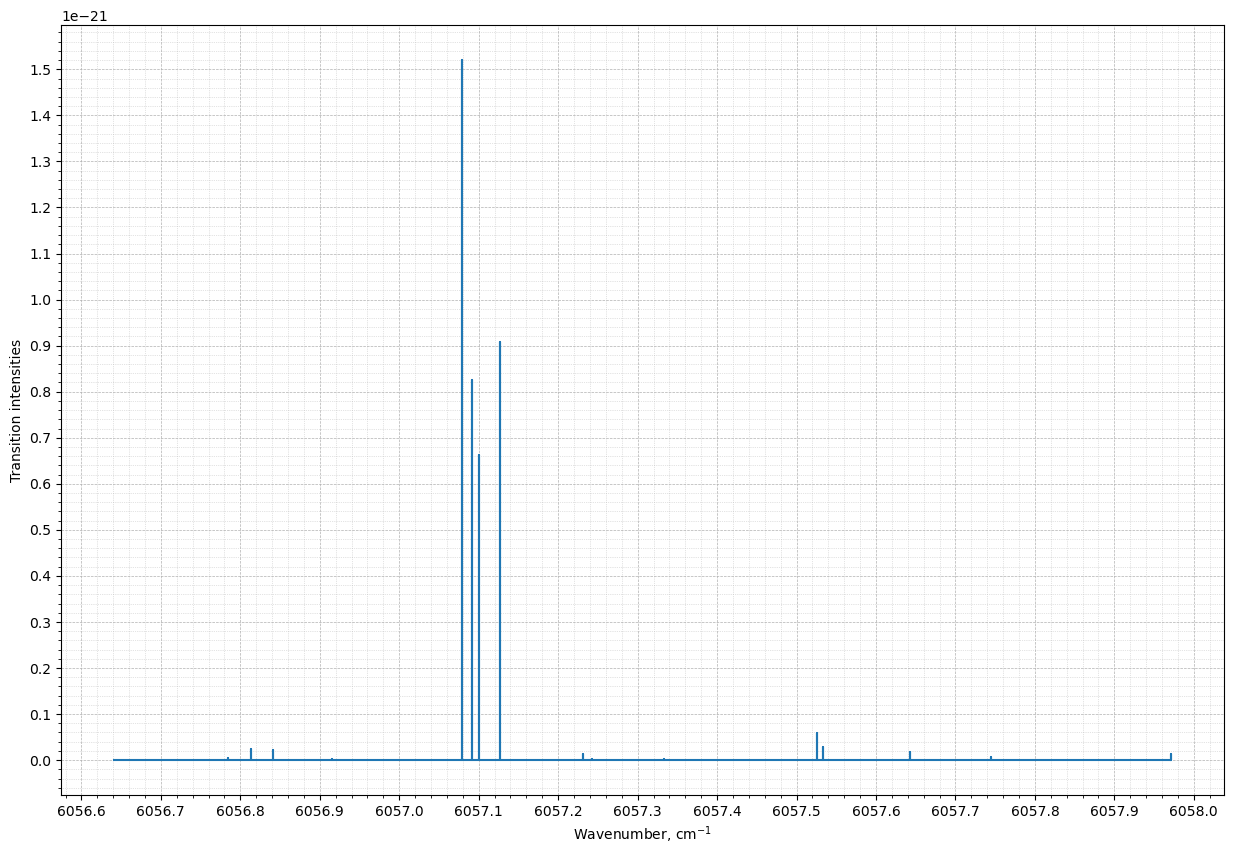

In [35]:
plt.figure(figsize=(15,10))

x,y = getStickXY('CH4')

plt.plot(x,y)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

plt.locator_params(axis='x', nbins=20) 
plt.locator_params(axis='y', nbins=20)  

plt.xlabel(r'Wavenumber, $\mathrm{cm}^{-1}$')
plt.ylabel('Transition intensities')
plt.show()

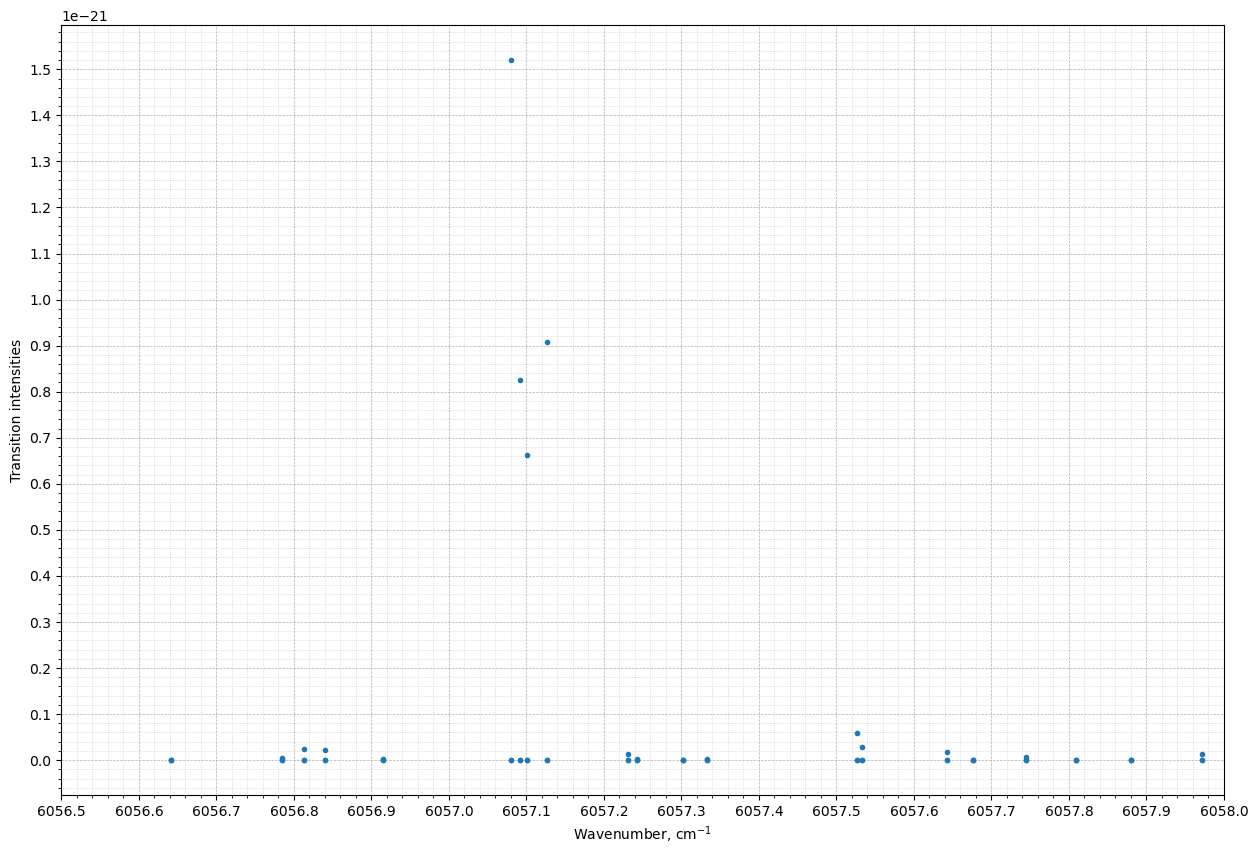

In [37]:
plt.figure(figsize=(15,10))

plt.grid(True, which='both', linestyle='--', linewidth=0.2)

plt.plot(x,y,'.')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

plt.locator_params(axis='x', nbins=20) 
plt.locator_params(axis='y', nbins=20)  

plt.xlabel(r'Wavenumber, $\mathrm{cm}^{-1}$')
plt.ylabel('Transition intensities'); plt.xlim([wavenum_min,wavenum_max]); plt.show()

In [42]:
v0 = getColumn('CH4', 'nu')

if v0.size > 0:

    nu_vars = {}


    for i, value in enumerate(v0):
        var_name = f"nu_{i+1}"
        nu_vars[var_name] = value


 #   for var_name, value in nu_vars.items():
#        print(f"{var_name}: {value}")
else:
    print("Массив значений пуст.")


In [230]:
nu_6 = nu_vars["nu_6"]
nu_7 = nu_vars["nu_7"]
nu_8 = nu_vars["nu_8"]
nu_9 = nu_vars["nu_9"]

# Выводим значения переменных для проверки
print(f"nu_6: {nu_6}")
print(f"nu_7: {nu_7}")
print(f"nu_8: {nu_8}")
print(f"nu_9: {nu_9}")

nu_6: 6057.079548
nu_7: 6057.0919
nu_8: 6057.1004
nu_9: 6057.12695


In [236]:
gamma_air = getColumn('CH4', 'gamma_air')

if gamma_air.size > 0:

    gamma = {}


    for i, value in enumerate(gamma_air):
        var_name = f"gamma_air{i+1}"
        gamma[var_name] = value


 #   for var_name, value in gamma.items():
 #       print(f"{var_name}: {value}")
else:
    print("Массив значений пуст.")


In [242]:
gamma_air_6 = gamma["gamma_air6"]
gamma_air_7 = gamma["gamma_air7"]
gamma_air_8 = gamma["gamma_air8"]
gamma_air_9 = gamma["gamma_air9"]

# Выводим значения переменных для проверки
print(f"gamma_air_6: {gamma_air_6}")
print(f"gamma_air_7: {gamma_air_7}")
print(f"gamma_air_8: {gamma_air_8}")
print(f"gamma_air_9: {gamma_air_9}")

gamma_air_6: 0.0625
gamma_air_7: 0.065
gamma_air_8: 0.0614
gamma_air_9: 0.063


In [50]:
gamma_self = getColumn('CH4', 'gamma_self')

if gamma_self.size > 0:

    gammas = {}


    for i, value in enumerate(gamma_self):
        var_name = f"gamma_self{i+1}"
        gammas[var_name] = value


#    for var_name, value in gammas.items():
 #       print(f"{var_name}: {value}")
else:
    print("Массив значений пуст.")


In [244]:
gamma_self_6 = gammas["gamma_self6"]
gamma_self_7 = gammas["gamma_self7"]
gamma_self_8 = gammas["gamma_self8"]
gamma_self_9 = gammas["gamma_self9"]
# Выводим значения переменных для проверки
print(f"gamma_self_6: {gamma_self_6}")
print(f"gamma_self_7: {gamma_self_7}")
print(f"gamma_self_8: {gamma_self_8}")
print(f"gamma_self_9: {gamma_self_9}")

gamma_self_6: 0.078
gamma_self_7: 0.078
gamma_self_8: 0.078
gamma_self_9: 0.078


In [54]:
delta_air = getColumn('CH4', 'delta_air')

if delta_air.size > 0:

    delta = {}


    for i, value in enumerate(delta_air):
        var_name = f"delta_air{i+1}"
        delta[var_name] = value


  #  for var_name, value in delta.items():
   #     print(f"{var_name}: {value}")
else:
    print("Массив значений пуст.")


In [248]:
delta_air_6 = delta["delta_air6"]
delta_air_7 = delta["delta_air7"]
delta_air_8 = delta["delta_air8"]
delta_air_9 = delta["delta_air9"]

# Выводим значения переменных для проверки
print(f"delta_air_6: {delta_air_6}")
print(f"delta_air_7: {delta_air_7}")
print(f"delta_air_8: {delta_air_8}")
print(f"delta_air_9: {delta_air_9}")

delta_air_6: -0.0121
delta_air_7: -0.0121
delta_air_8: -0.0121
delta_air_9: -0.0121


In [252]:
n_air = getColumn('CH4', 'n_air')

if n_air.size > 0:

    n = {}


    for i, value in enumerate(n_air):
        var_name = f"n_air{i+1}"
        n[var_name] = value


#    for var_name, value in n.items():
 #       print(f"{var_name}: {value}")
else:
    print("Массив значений пуст.")


In [254]:
n_air_6 = n["n_air6"]
n_air_7 = n["n_air7"]
n_air_8 = n["n_air8"]
n_air_9 = n["n_air9"] 

# Выводим значения переменных для проверки
print(f"n_air_6: {n_air_6}")
print(f"n_air_7: {n_air_7}")
print(f"n_air_8: {n_air_8}")
print(f"n_air_9: {n_air_9}")

n_air_6: 0.72
n_air_7: 0.72
n_air_8: 0.72
n_air_9: 0.72


In [256]:
e_lower = getColumn('CH4', 'elower')

if e_lower.size > 0:

    elower = {}


    for i, value in enumerate(e_lower):
        var_name = f"e_lower{i+1}"
        elower[var_name] = value


 #   for var_name, value in elower.items():
  #      print(f"{var_name}: {value}")
else:
    print("Массив значений пуст.")


In [268]:
e_lower_6 = elower["e_lower6"]
e_lower_7 = elower["e_lower7"]
e_lower_8 = elower["e_lower8"]
e_lower_9 = elower["e_lower9"]

# Выводим значения переменных для проверки
print(f"e_lower_6: {e_lower_6}")
print(f"e_lower_7: {e_lower_7}")
print(f"e_lower_8: {e_lower_8}")
print(f"e_lower_9: {e_lower_9}")

e_lower_6: 104.7728
e_lower_7: 104.7747
e_lower_8: 104.776
e_lower_9: 104.78


In [66]:
S_ref = getColumn('CH4', 'sw')

if S_ref.size > 0:

    Sref = {}


    for i, value in enumerate(S_ref):
        var_name = f"S_ref{i+1}"
        Sref[var_name] = value


 #   for var_name, value in Sref.items():
       # print(f"{var_name}: {value}")
else:
    print("Массив значений пуст.")


In [266]:
sw_6 = Sref["S_ref6"]
sw_7 = Sref["S_ref7"]
sw_8 = Sref["S_ref8"]
sw_9 = Sref["S_ref9"]

# Выводим значения переменных для проверки
print(f"sw_6: {sw_6}")
print(f"sw_7: {sw_7}")
print(f"sw_8: {sw_8}")
print(f"sw_9: {sw_9}")

sw_6: 1.52e-21
sw_7: 8.244e-22
sw_8: 6.631e-22
sw_9: 9.077e-22


In [72]:
alfaD = Alfa_D(v0, T, M)

if alfaD.size > 0:

    alfa_d = {}


    for i, value in enumerate(alfaD):
        var_name = f"alfa_d{i+1}"
        alfa_d[var_name] = value


  #  for var_name, value in alfa_d.items():
   #     print(f"{var_name}: {value}")
else:
    print("Массив значений пуст.")


In [264]:
alphaD_6 = alfa_d["alfa_d6"]
alphaD_7 = alfa_d["alfa_d7"]
alphaD_8 = alfa_d["alfa_d8"]
alphaD_9 = alfa_d["alfa_d9"]

# Выводим значения переменных для проверки
print(f"alphaD_6: {alphaD_6}")
print(f"alphaD_7: {alphaD_7}")
print(f"alphaD_8: {alphaD_8}")
print(f"alphaD_9: {alphaD_9}")

alphaD_6: 0.009383474316904004
alphaD_7: 0.009383493452309747
alphaD_8: 0.009383506620294593
alphaD_9: 0.00938354775088255


In [76]:
gammaL = Gamma_L(T, n_air, p, p_self, gamma_air, gamma_self)

if gammaL.size > 0:

    gL = {}


    for i, value in enumerate(gammaL):
        var_name = f"gammaL{i+1}"
        gL[var_name] = value


#    for var_name, value in gL.items():
 #       print(f"{var_name}: {value}")
else:
    print("Массив значений пуст.")


In [272]:
gammaL_6 = gL["gammaL6"]
gammaL_7 = gL["gammaL7"]
gammaL_8 = gL["gammaL8"]
gammaL_9 = gL["gammaL9"]

# Выводим значения переменных для проверки
print(f"gammaL_6: {gammaL_6}")
print(f"gammaL_7: {gammaL_7}")
print(f"gammaL_8: {gammaL_8}")
print(f"gammaL_9: {gammaL_9}")

gammaL_6: 0.06189890695560766
gammaL_7: 0.06437485651556321
gammaL_8: 0.06080948914922722
gammaL_9: 0.062394096867598774


In [80]:
S = Intensity(T, v0, e_lower)

if S.size > 0:

    s = {}


    for i, value in enumerate(S):
        var_name = f"S{i+1}"
        s[var_name] = value


#    for var_name, value in s.items():
 #       print(f"{var_name}: {value}")
else:
    print("Массив значений пуст.")

In [274]:
S_6 = s["S6"]
S_7 = s["S7"]
S_8 = s["S8"]
S_9 = s["S9"]

# Выводим значения переменных для проверки
print(f"S_6: {S_6}")
print(f"S_7: {S_7}")
print(f"S_8: {S_8}")
print(f"S_9: {S_9}")

S_6: 1.499035976383872e-21
S_7: 8.130298757277358e-22
S_8: 6.539545803219179e-22
S_9: 8.951813096684307e-22


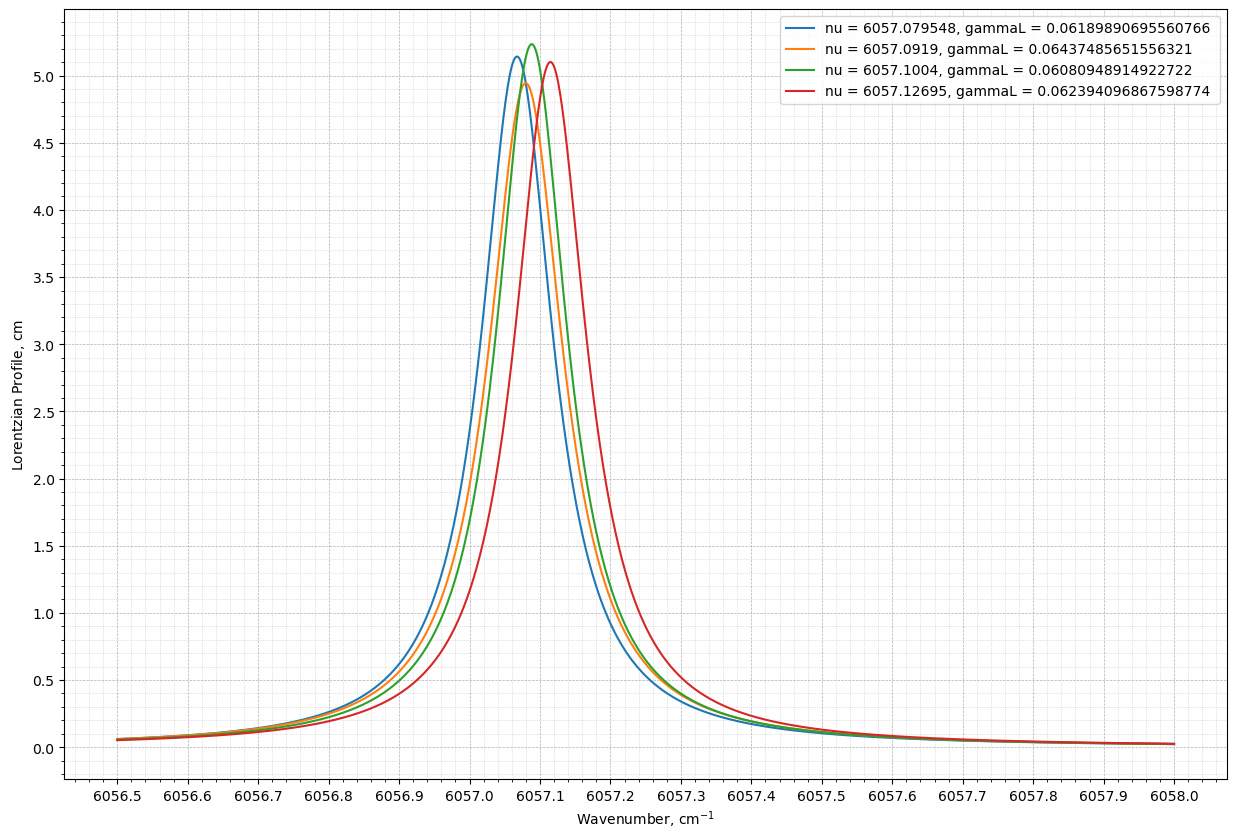

In [166]:
Fl1 = Lorentzian_Profile(wn, nu_6, gammaL_6, delta_air_6)
Fl2 = Lorentzian_Profile(wn, nu_7, gammaL_7, delta_air_7)
Fl3 = Lorentzian_Profile(wn, nu_8, gammaL_8, delta_air_8)
Fl4 = Lorentzian_Profile(wn, nu_9, gammaL_9, delta_air_9)

#Fg1 = Doppler_Profile(wn, nu_6, alphaD_6)

plt.figure(figsize=(15,10))


plt.plot(wn, Fl1, label = 'nu = 6057.079548, gammaL = 0.06189890695560766')
plt.plot(wn, Fl2, label = 'nu = 6057.0919, gammaL = 0.06437485651556321')
plt.plot(wn, Fl3, label = 'nu = 6057.1004, gammaL = 0.06080948914922722 ')
plt.plot(wn, Fl4, label = 'nu = 6057.12695, gammaL = 0.062394096867598774 ')


plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

plt.locator_params(axis='x', nbins=20) 
plt.locator_params(axis='y', nbins=20) 

plt.xlabel(r'Wavenumber, $\mathrm{cm}^{-1}$')
plt.ylabel(r'Lorentzian Profile, $\mathrm{cm}$')
plt.show()

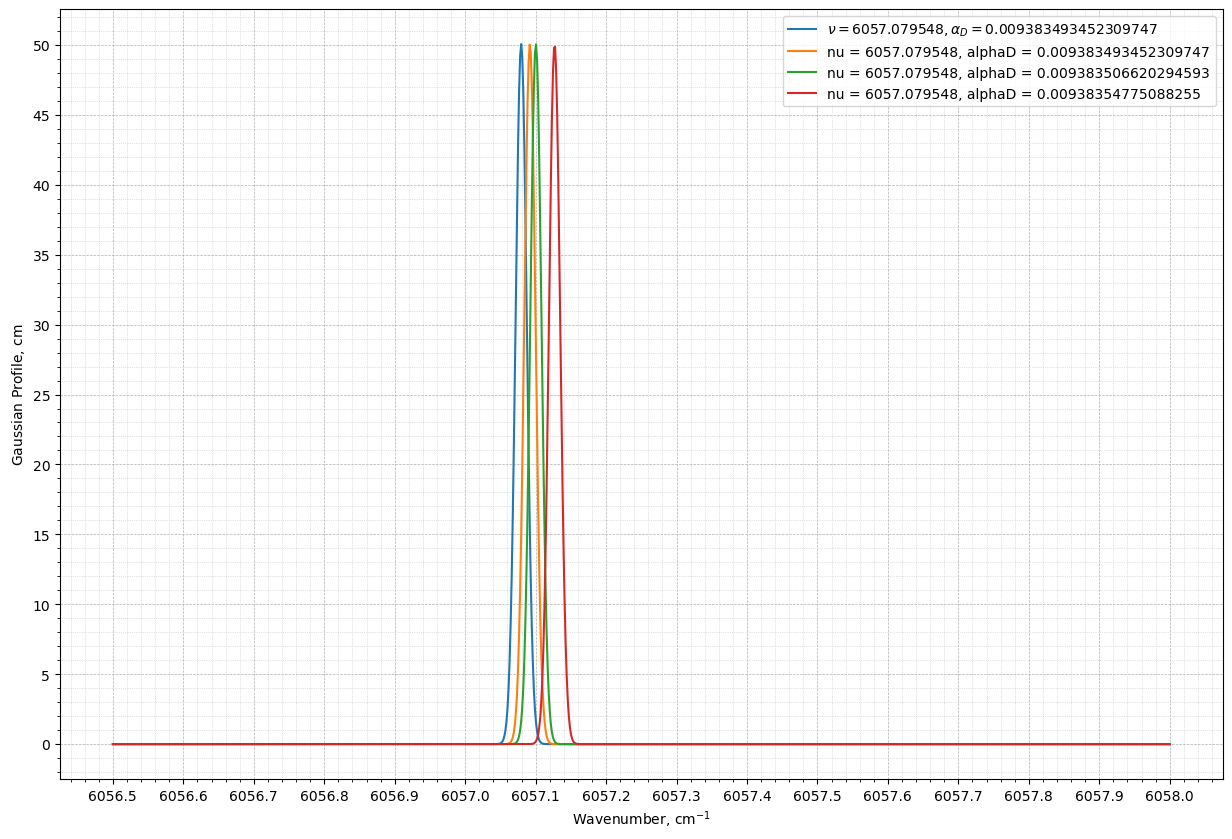

In [168]:
Fg1 = Doppler_Profile(wn, nu_6, alphaD_6)
Fg2 = Doppler_Profile(wn, nu_7, alphaD_7)
Fg3 = Doppler_Profile(wn, nu_8, alphaD_8)
Fg4 = Doppler_Profile(wn, nu_9, alphaD_9)

plt.figure(figsize=(15,10))


plt.plot(wn, Fg1, label = r'$\nu = 6057.079548, \alpha_D = 0.009383493452309747$')
plt.plot(wn, Fg2, label = 'nu = 6057.079548, alphaD = 0.009383493452309747')
plt.plot(wn, Fg3, label = 'nu = 6057.079548, alphaD = 0.009383506620294593')
plt.plot(wn, Fg4, label = 'nu = 6057.079548, alphaD = 0.00938354775088255')

plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

plt.locator_params(axis='x', nbins=20) 
plt.locator_params(axis='y', nbins=20)  

plt.xlabel(r'Wavenumber, $\mathrm{cm}^{-1}$')
plt.ylabel(r'Gaussian Profile, $\mathrm{cm}$')
plt.show()

In [286]:
def Voigt_Profile(wn, nu, alphaD, gammaL):
    sigma = alphaD / np.sqrt(2 * np.log(2))
    z = (wn - nu + 1j * gammaL) / sigma / np.sqrt(2)
    return np.real(wofz(z)) / sigma / np.sqrt(2 * np.pi)

In [288]:
Fv1 = Voigt_Profile(wn, nu_6, alphaD_6, gammaL_6)
Fv2 = Voigt_Profile(wn, nu_7, alphaD_7, gammaL_7)
Fv3 = Voigt_Profile(wn, nu_8, alphaD_8, gammaL_8)
Fv4 = Voigt_Profile(wn, nu_9, alphaD_9, gammaL_9)

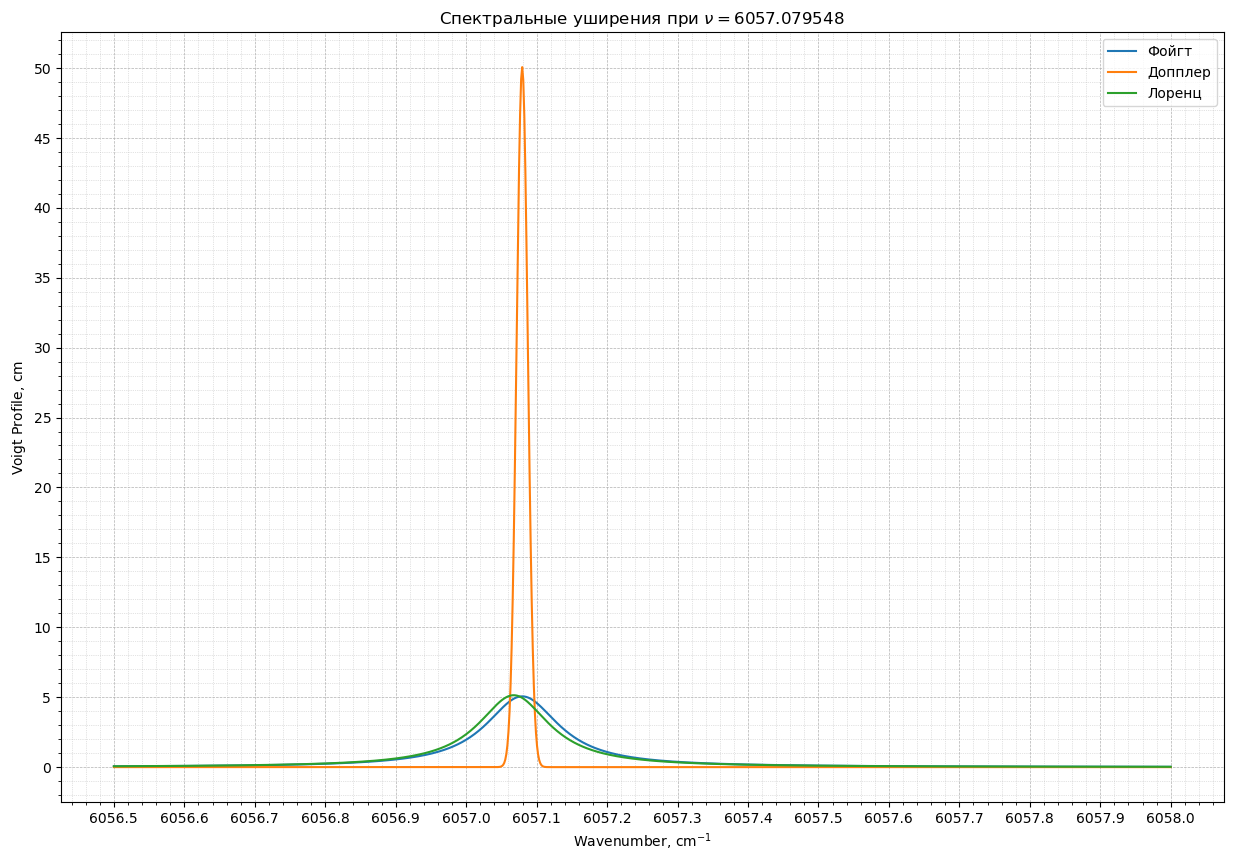

In [136]:
plt.figure(figsize=(15, 10))



plt.title(r'Спектральные уширения при $\nu = 6057.079548$')
plt.plot(wn, Fv1, label='Фойгт')
plt.plot(wn, Fg1, label = 'Допплер')
plt.plot(wn, Fl1, label = 'Лоренц')

plt.legend()



plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

plt.locator_params(axis='x', nbins=20) 
plt.locator_params(axis='y', nbins=20)  

plt.xlabel(r'Wavenumber, $\mathrm{cm}^{-1}$')
plt.ylabel(r'Voigt Profile, $\mathrm{cm}$')
plt.show()

In [290]:
k1 = Absorption_Coefficient(S_6, Fv1)
k2 = Absorption_Coefficient(S_7, Fv2)
k3 = Absorption_Coefficient(S_8, Fv3)
k4 = Absorption_Coefficient(S_9, Fv4)

In [292]:
N_air = (p*1013250.110)/(k*T)

n = N_air*C

print('N_air =', N_air)
print('n =', n)
l = 100000   #длина оптического пути

N_air = 2.4463135573680685e+19
n = 53818898262097.51


In [294]:
sum_array = (k1 + k2 + k3 + k4)

In [296]:
t = Transmission_Coefficient(sum_array)

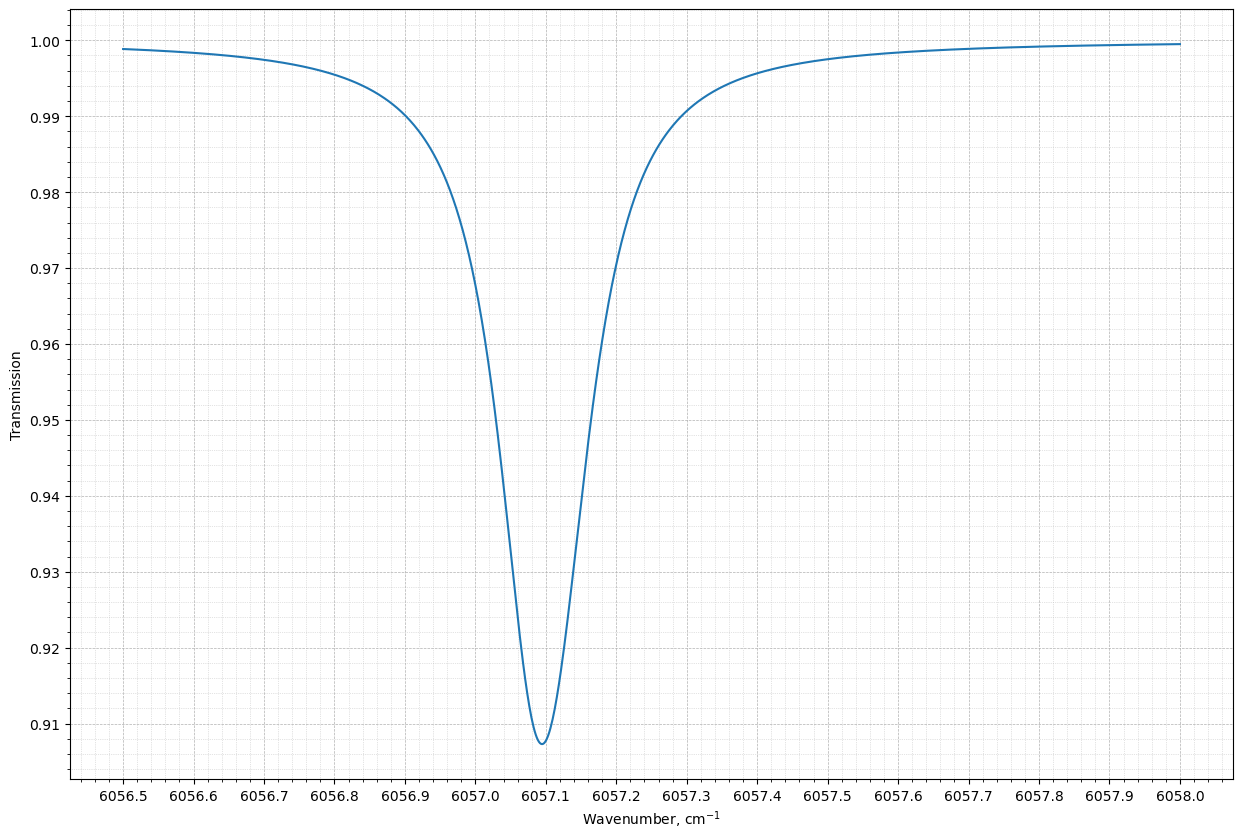

In [298]:
plt.figure(figsize=(15, 10))


plt.plot(wn, t)


plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

plt.locator_params(axis='x', nbins=20) 
plt.locator_params(axis='y', nbins=20)  

plt.xlabel(r'Wavenumber, $\mathrm{cm}^{-1}$')
plt.ylabel(r'Transmission')
plt.show()

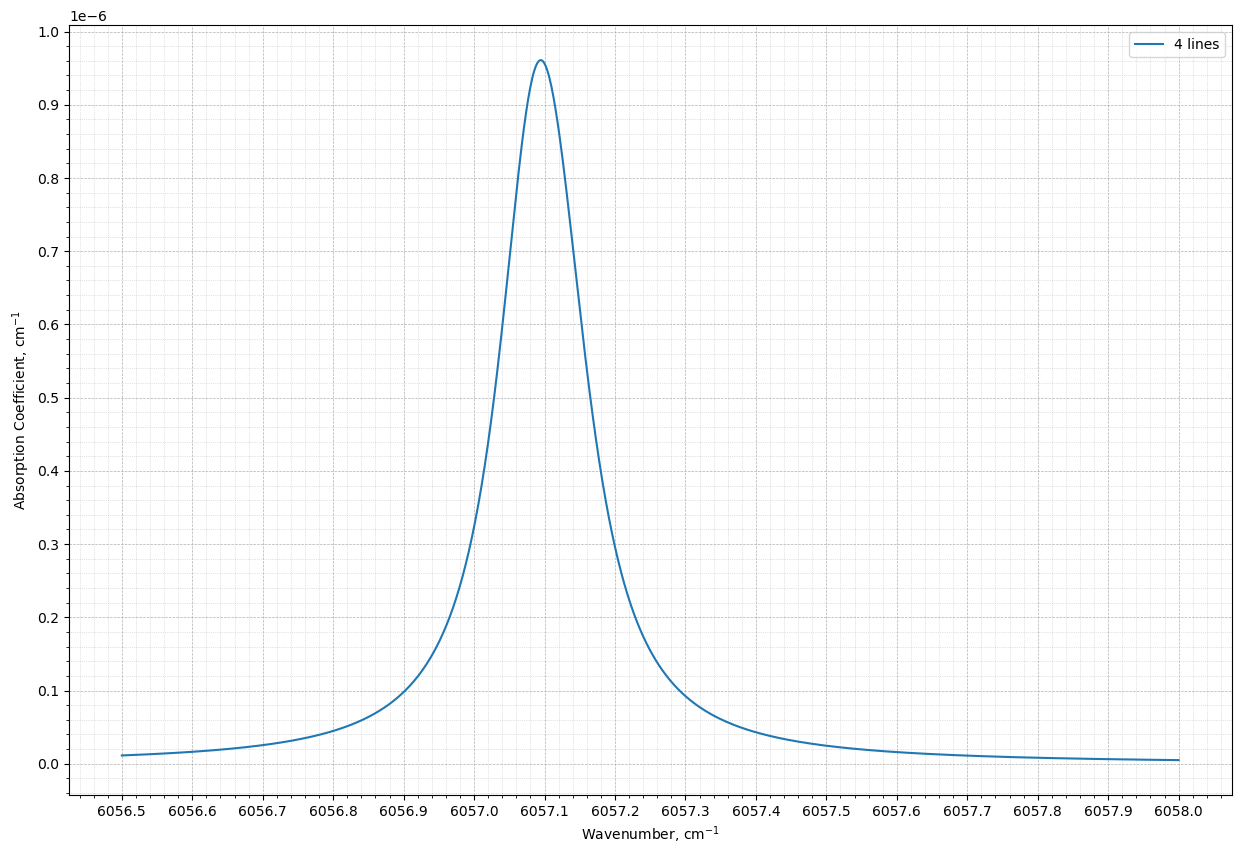

In [118]:
plt.figure(figsize=(15, 10))

plt.plot(wn, N*sum_array, label = '4 lines')

plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

plt.locator_params(axis='x', nbins=20) 
plt.locator_params(axis='y', nbins=20)  

plt.xlabel(r'Wavenumber, $\mathrm{cm}^{-1}$')
plt.ylabel(r'Absorption Coefficient, $\mathrm{cm}^{-1}$')
plt.show()

In [126]:
file_path = '/Users/dandr/Desktop/Спектроскопия/CH4.csv'

df = pd.read_csv(file_path, delimiter=';', names=['wn', 'Ab'])

# Преобразование данных в числовой формат
df['wn'] = pd.to_numeric(df['wn'], errors='coerce')
df['Ab'] = pd.to_numeric(df['Ab'], errors='coerce')

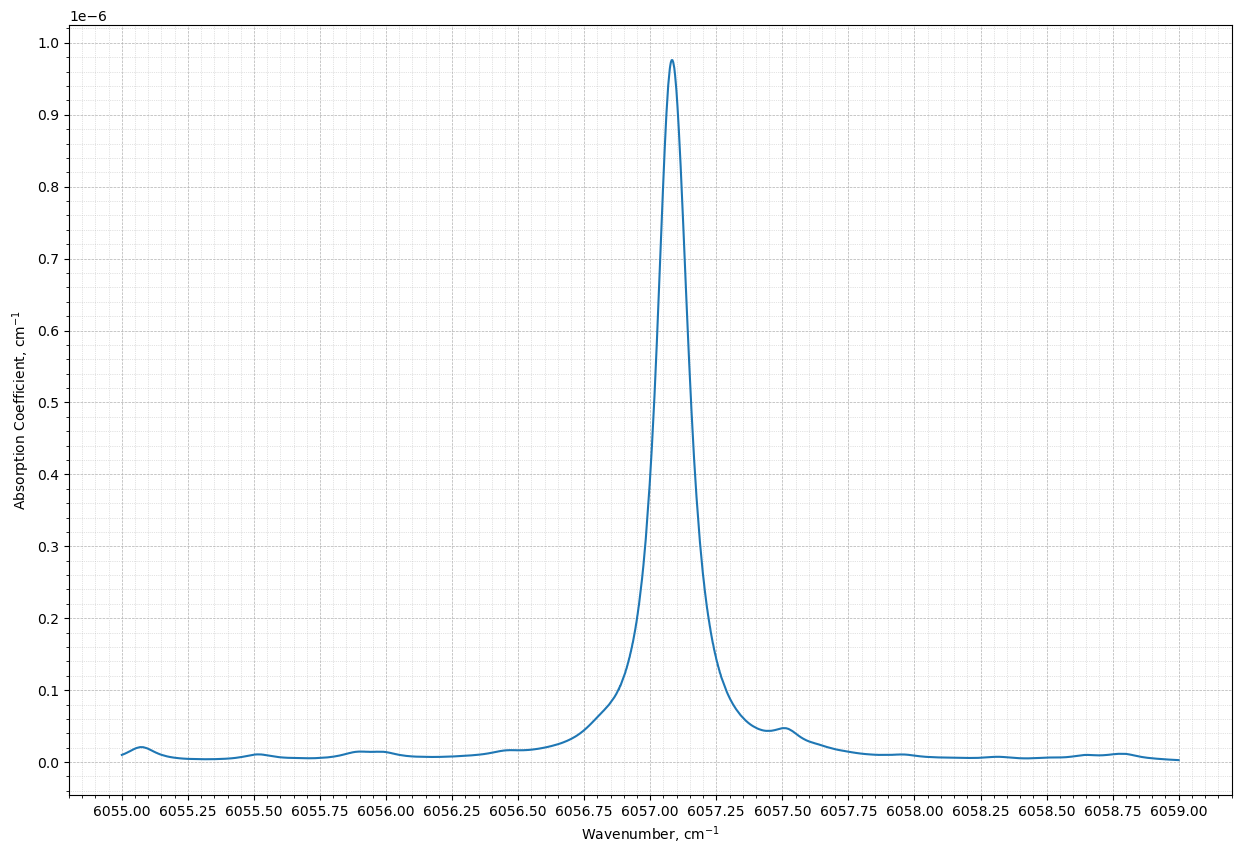

In [130]:
plt.figure(figsize=(15, 10))


plt.plot(df['wn'], df['Ab'])
plt.xlabel(r'Wavenumber, $\mathrm{cm}^{-1}$')
plt.ylabel(r'Absorption Coefficient, $\mathrm{cm}^{-1}$')

#plt.legend()

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

plt.locator_params(axis='x', nbins=20) 
plt.locator_params(axis='y', nbins=20)

plt.show()